<a href="https://colab.research.google.com/github/ilyeso/CI-CD-Train-Management/blob/main/Multi_Label_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
annotations_path = '/content/drive/MyDrive/Stage4eme_Data/combined_annotations.pkl'
image_dir = '/content/drive/MyDrive/Stage4eme_Data/all_data/'

In [4]:
df = pd.read_pickle(annotations_path)
df.head()

,fname,labels,is_valid
0,Aimage_1.jpg,algues rochers,True
1,Aimage_2.jpg,algues rochers,True
2,Aimage_3.jpg,algues rochers,True
3,Aimage_4.jpg,algues rochers,True
4,Aimage_5.jpg,algues rochers,True


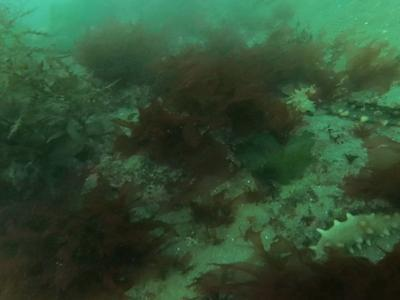

In [5]:
img_name = df.iloc[18]['fname']
img_path = f"{image_dir}/{img_name}"
img = Image.open(img_path)
img

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Split labels into lists
df['labels'] = df['labels'].apply(lambda x: x.split())

# One-hot encoding of the labels
mlb = MultiLabelBinarizer()
df_labels = pd.DataFrame(mlb.fit_transform(df['labels']), columns=mlb.classes_, index=df.index)

# Merge one-hot encoded labels with original dataframe
df = pd.concat([df, df_labels], axis=1)

# Image loading function
def load_image(filename):
    img_path = os.path.join(image_dir, filename)
    img = Image.open(img_path)
    return np.array(img)


In [30]:
df.shape

(1259, 6)

# **Deep Learning Models**

In [7]:
# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
    df,
    directory=image_dir,
    x_col='fname',
    y_col=mlb.classes_,
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw',
    subset='training'
)

valid_generator = datagen.flow_from_dataframe(
    df,
    directory=image_dir,
    x_col='fname',
    y_col=mlb.classes_,
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw',
    subset='validation'
)

Found 1008 validated image filenames.
Found 251 validated image filenames.


## ResNet50

Fold 1/5
Found 1007 validated image filenames.
Found 252 validated image filenames.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
32/32 [==============================] - 380s 12s/step - loss: 1.7524 - accuracy: 0.2284 - val_loss: 0.4628 - val_accuracy: 0.2460
Epoch 2/10
32/32 [==============================] - 9s 278ms/step - loss: 0.4543 - accuracy: 0.3208 - val_loss: 0.4633 - val_accuracy: 0.2421
Epoch 3/10
32/32 [==============================] - 10s 309ms/step - loss: 0.4248 - accuracy: 0.2830 - val_loss: 0.7092 - val_accuracy: 0.1508
Epoch 4/10
32/32 [==============================] - 10s 300ms/step - loss: 0.4726 - accuracy: 0.3019 - val_loss: 0.3864 - val_accuracy: 0.2976
Epoch 5/10
32/32 [==============================] - 9s 280ms/step - loss: 0.4484 - accuracy: 0.2999 - val_loss: 0.4793 - val_accuracy: 0.5992
Epoch 6/10
32/32 [==============================] - 10s 301ms/step - loss: 0.4577 - accuracy: 0.3436 - val_loss: 0.3921 - val_accuracy: 0.3

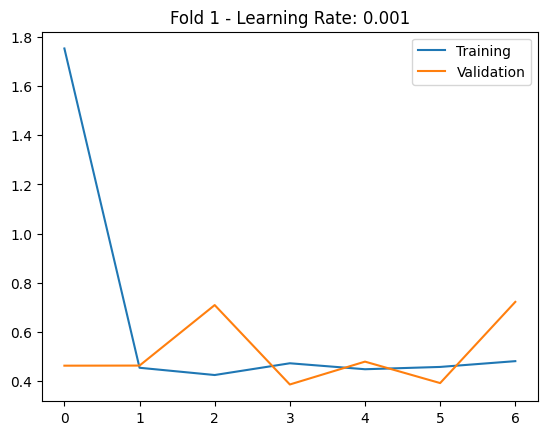

Epoch 1/10
32/32 [==============================] - 15s 353ms/step - loss: 0.6165 - accuracy: 0.2125 - val_loss: 0.4992 - val_accuracy: 0.1310
Epoch 2/10
32/32 [==============================] - 10s 310ms/step - loss: 0.4766 - accuracy: 0.2195 - val_loss: 0.4931 - val_accuracy: 0.1746
Epoch 3/10
32/32 [==============================] - 12s 387ms/step - loss: 0.4544 - accuracy: 0.1966 - val_loss: 0.6742 - val_accuracy: 0.1508
Epoch 4/10
32/32 [==============================] - 10s 318ms/step - loss: 0.4541 - accuracy: 0.2463 - val_loss: 0.4420 - val_accuracy: 0.2302
Epoch 5/10
32/32 [==============================] - 10s 305ms/step - loss: 0.4102 - accuracy: 0.2393 - val_loss: 0.4133 - val_accuracy: 0.3056
Epoch 6/10
32/32 [==============================] - 10s 307ms/step - loss: 0.4000 - accuracy: 0.2443 - val_loss: 0.4383 - val_accuracy: 0.2063
Epoch 7/10
32/32 [==============================] - 9s 275ms/step - loss: 0.3880 - accuracy: 0.2512 - val_loss: 0.3903 - val_accuracy: 0.2897


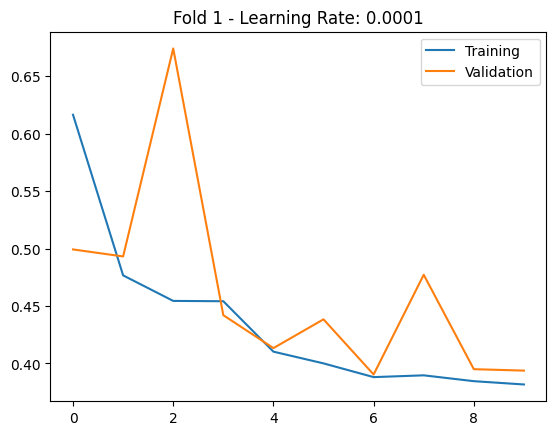

Fold 2/5
Found 1007 validated image filenames.
Found 252 validated image filenames.
Epoch 1/10
32/32 [==============================] - 16s 376ms/step - loss: 1.1330 - accuracy: 0.2572 - val_loss: 0.4736 - val_accuracy: 0.1984
Epoch 2/10
32/32 [==============================] - 10s 322ms/step - loss: 0.4827 - accuracy: 0.2642 - val_loss: 0.4242 - val_accuracy: 0.2381
Epoch 3/10
32/32 [==============================] - 9s 275ms/step - loss: 0.4375 - accuracy: 0.2393 - val_loss: 0.4205 - val_accuracy: 0.2222
Epoch 4/10
32/32 [==============================] - 10s 307ms/step - loss: 0.4256 - accuracy: 0.2155 - val_loss: 0.4901 - val_accuracy: 0.1627
Epoch 5/10
32/32 [==============================] - 10s 309ms/step - loss: 0.4388 - accuracy: 0.2066 - val_loss: 0.4901 - val_accuracy: 0.2024
Epoch 6/10
8/8 [==============================] - 2s 224ms/step - loss: 0.4205 - accuracy: 0.2222


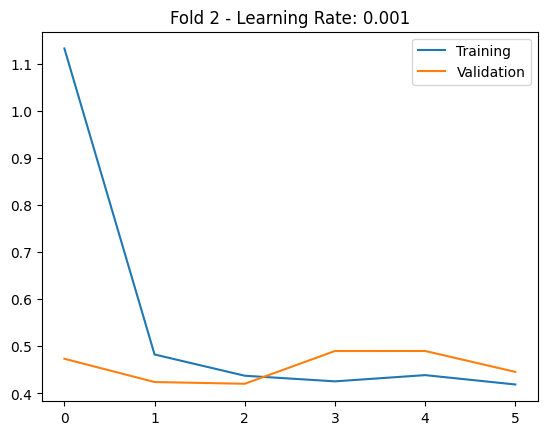

Epoch 1/10
32/32 [==============================] - 15s 357ms/step - loss: 0.6858 - accuracy: 0.1807 - val_loss: 0.4893 - val_accuracy: 0.1349
Epoch 2/10
32/32 [==============================] - 9s 290ms/step - loss: 0.4850 - accuracy: 0.1738 - val_loss: 0.4327 - val_accuracy: 0.1706
Epoch 3/10
32/32 [==============================] - 10s 313ms/step - loss: 0.4436 - accuracy: 0.1787 - val_loss: 0.3955 - val_accuracy: 0.2937
Epoch 4/10
32/32 [==============================] - 9s 295ms/step - loss: 0.4215 - accuracy: 0.2046 - val_loss: 0.4189 - val_accuracy: 0.2143
Epoch 5/10
32/32 [==============================] - 10s 311ms/step - loss: 0.4331 - accuracy: 0.2155 - val_loss: 0.4189 - val_accuracy: 0.2183
Epoch 6/10
8/8 [==============================] - 2s 198ms/step - loss: 0.3955 - accuracy: 0.2937


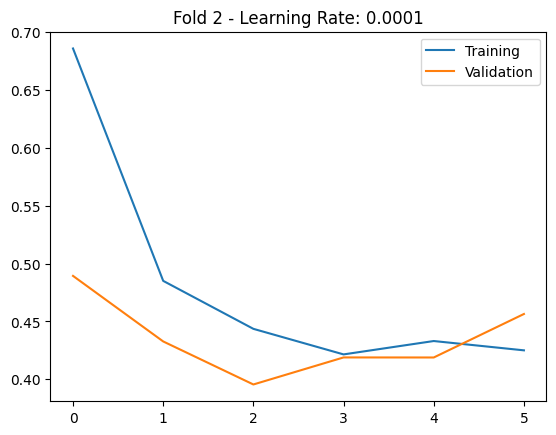

Fold 3/5
Found 1007 validated image filenames.
Found 252 validated image filenames.
Epoch 1/10
32/32 [==============================] - 15s 352ms/step - loss: 1.4956 - accuracy: 0.3029 - val_loss: 0.4721 - val_accuracy: 0.5992
Epoch 2/10
32/32 [==============================] - 9s 280ms/step - loss: 0.4822 - accuracy: 0.2105 - val_loss: 0.4615 - val_accuracy: 0.2897
Epoch 3/10
32/32 [==============================] - 10s 301ms/step - loss: 0.4278 - accuracy: 0.2155 - val_loss: 0.4308 - val_accuracy: 0.2738
Epoch 4/10
32/32 [==============================] - 10s 307ms/step - loss: 0.4125 - accuracy: 0.2145 - val_loss: 0.4340 - val_accuracy: 0.2302
Epoch 5/10
32/32 [==============================] - 10s 312ms/step - loss: 0.4174 - accuracy: 0.2354 - val_loss: 0.5600 - val_accuracy: 0.1548
Epoch 6/10
8/8 [==============================] - 2s 294ms/step - loss: 0.4308 - accuracy: 0.2738


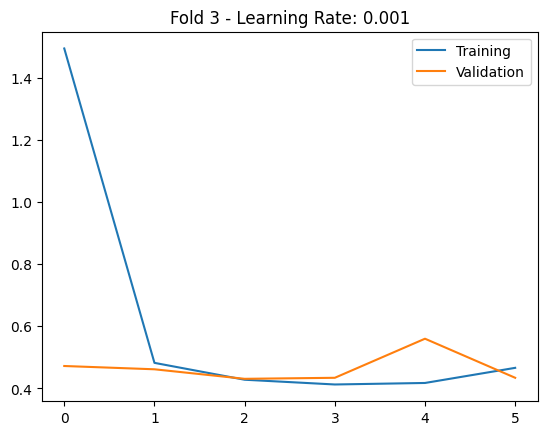

Epoch 1/10
32/32 [==============================] - 14s 345ms/step - loss: 0.6429 - accuracy: 0.1728 - val_loss: 0.5251 - val_accuracy: 0.1389
Epoch 2/10
32/32 [==============================] - 11s 327ms/step - loss: 0.4618 - accuracy: 0.1738 - val_loss: 0.5209 - val_accuracy: 0.1389
Epoch 3/10
32/32 [==============================] - 9s 295ms/step - loss: 0.4533 - accuracy: 0.1887 - val_loss: 0.6018 - val_accuracy: 0.1389
Epoch 4/10
32/32 [==============================] - 10s 321ms/step - loss: 0.4173 - accuracy: 0.2075 - val_loss: 0.4175 - val_accuracy: 0.2540
Epoch 5/10
32/32 [==============================] - 9s 272ms/step - loss: 0.4227 - accuracy: 0.2085 - val_loss: 0.4267 - val_accuracy: 0.2976
Epoch 6/10
32/32 [==============================] - 10s 306ms/step - loss: 0.4169 - accuracy: 0.2314 - val_loss: 0.4489 - val_accuracy: 0.2619
Epoch 7/10
8/8 [==============================] - 2s 249ms/step - loss: 0.4175 - accuracy: 0.2540


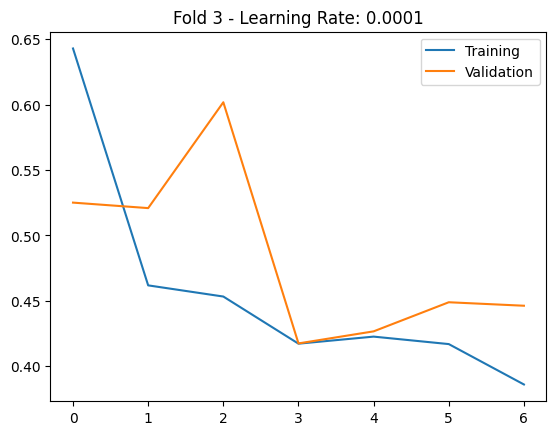

Fold 4/5
Found 1007 validated image filenames.
Found 252 validated image filenames.
Epoch 1/10
32/32 [==============================] - 15s 349ms/step - loss: 1.5107 - accuracy: 0.2880 - val_loss: 0.4269 - val_accuracy: 0.1786
Epoch 2/10
32/32 [==============================] - 10s 302ms/step - loss: 0.5016 - accuracy: 0.2771 - val_loss: 0.5209 - val_accuracy: 0.1548
Epoch 3/10
32/32 [==============================] - 10s 297ms/step - loss: 0.4572 - accuracy: 0.2373 - val_loss: 0.4267 - val_accuracy: 0.2143
Epoch 4/10
32/32 [==============================] - 10s 295ms/step - loss: 0.4162 - accuracy: 0.2354 - val_loss: 0.4400 - val_accuracy: 0.2857
Epoch 5/10
32/32 [==============================] - 10s 312ms/step - loss: 0.4155 - accuracy: 0.2572 - val_loss: 0.4425 - val_accuracy: 0.1944
Epoch 6/10
8/8 [==============================] - 2s 255ms/step - loss: 0.4267 - accuracy: 0.2143


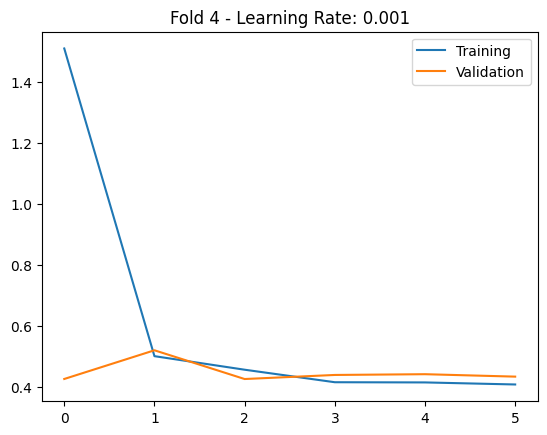

Epoch 1/10
32/32 [==============================] - 16s 372ms/step - loss: 0.6340 - accuracy: 0.2354 - val_loss: 0.4761 - val_accuracy: 0.1627
Epoch 2/10
32/32 [==============================] - 10s 307ms/step - loss: 0.4757 - accuracy: 0.2214 - val_loss: 0.4345 - val_accuracy: 0.2341
Epoch 3/10
32/32 [==============================] - 9s 281ms/step - loss: 0.4563 - accuracy: 0.2274 - val_loss: 0.5261 - val_accuracy: 0.2183
Epoch 4/10
32/32 [==============================] - 10s 310ms/step - loss: 0.4306 - accuracy: 0.2393 - val_loss: 0.4505 - val_accuracy: 0.2500
Epoch 5/10
32/32 [==============================] - 10s 316ms/step - loss: 0.4180 - accuracy: 0.2413 - val_loss: 0.4161 - val_accuracy: 0.2659
Epoch 6/10
32/32 [==============================] - 9s 274ms/step - loss: 0.3965 - accuracy: 0.2443 - val_loss: 0.4326 - val_accuracy: 0.1944
Epoch 7/10
32/32 [==============================] - 10s 303ms/step - loss: 0.3950 - accuracy: 0.2453 - val_loss: 0.3852 - val_accuracy: 0.2817
E

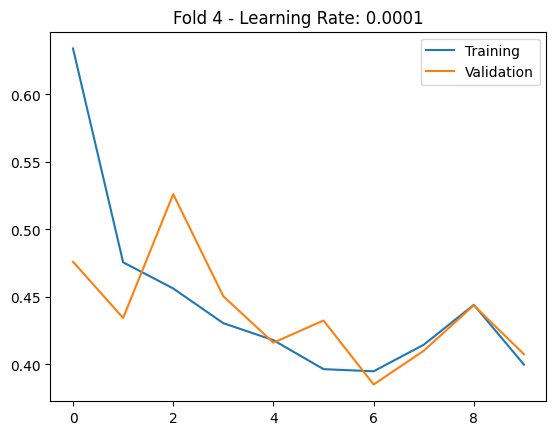

Fold 5/5
Found 1008 validated image filenames.
Found 251 validated image filenames.
Epoch 1/10
32/32 [==============================] - 17s 428ms/step - loss: 1.9500 - accuracy: 0.2986 - val_loss: 0.7040 - val_accuracy: 0.1195
Epoch 2/10
32/32 [==============================] - 11s 342ms/step - loss: 0.5382 - accuracy: 0.2312 - val_loss: 0.5461 - val_accuracy: 0.1394
Epoch 3/10
32/32 [==============================] - 10s 300ms/step - loss: 0.4096 - accuracy: 0.2401 - val_loss: 0.5937 - val_accuracy: 0.1713
Epoch 4/10
32/32 [==============================] - 10s 313ms/step - loss: 0.4298 - accuracy: 0.2718 - val_loss: 0.4914 - val_accuracy: 0.1673
Epoch 5/10
32/32 [==============================] - 10s 320ms/step - loss: 0.5121 - accuracy: 0.2996 - val_loss: 0.4859 - val_accuracy: 0.2430
Epoch 6/10
32/32 [==============================] - 9s 296ms/step - loss: 0.4484 - accuracy: 0.2877 - val_loss: 0.4257 - val_accuracy: 0.1873
Epoch 7/10
32/32 [==============================] - 10s 322

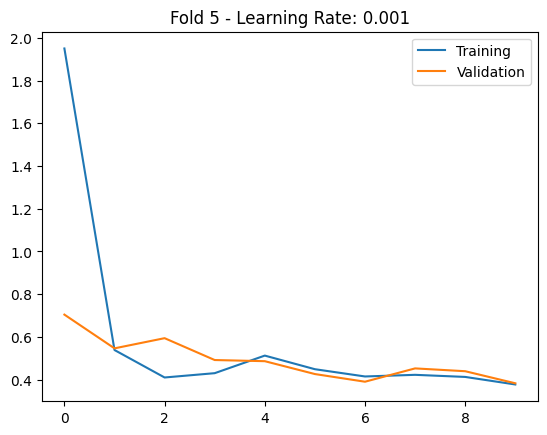

Epoch 1/10
32/32 [==============================] - 15s 353ms/step - loss: 0.6187 - accuracy: 0.1567 - val_loss: 0.4743 - val_accuracy: 0.1355
Epoch 2/10
32/32 [==============================] - 10s 319ms/step - loss: 0.4701 - accuracy: 0.1954 - val_loss: 0.4429 - val_accuracy: 0.1434
Epoch 3/10
32/32 [==============================] - 10s 304ms/step - loss: 0.4521 - accuracy: 0.2014 - val_loss: 0.4381 - val_accuracy: 0.1793
Epoch 4/10
32/32 [==============================] - 11s 338ms/step - loss: 0.4233 - accuracy: 0.1845 - val_loss: 0.4274 - val_accuracy: 0.1873
Epoch 5/10
32/32 [==============================] - 10s 328ms/step - loss: 0.4158 - accuracy: 0.2292 - val_loss: 0.4096 - val_accuracy: 0.1833
Epoch 6/10
32/32 [==============================] - 9s 284ms/step - loss: 0.4155 - accuracy: 0.2401 - val_loss: 0.4685 - val_accuracy: 0.3546
Epoch 7/10
32/32 [==============================] - 10s 309ms/step - loss: 0.4222 - accuracy: 0.2470 - val_loss: 0.4592 - val_accuracy: 0.1952


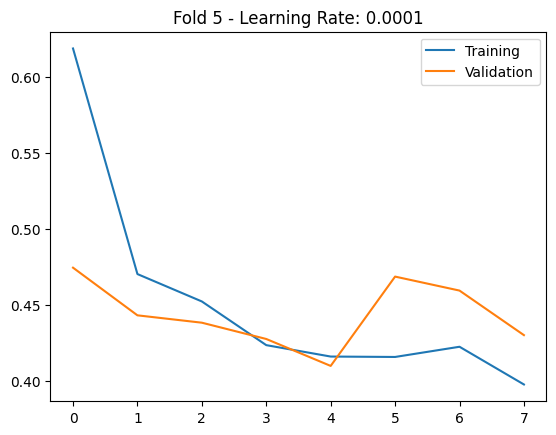

Best Validation Accuracy: 0.32270917296409607
Best Hyperparameters: {'learning_rate': 0.001}


In [8]:
# Cross-Validation Setup
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Hyperparameter Grid
param_grid = {
    'learning_rate': [0.001, 0.0001]
}

best_score = 0.0
best_params = {}

for fold, (train_indices, val_indices) in enumerate(kfold.split(df)):
    print(f"Fold {fold + 1}/{num_folds}")

    # Create data generators for this fold
    train_generator = datagen.flow_from_dataframe(
        df.iloc[train_indices],
        directory=image_dir,
        x_col='fname',
        y_col=mlb.classes_,
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
    )

    valid_generator = datagen.flow_from_dataframe(
        df.iloc[val_indices],
        directory=image_dir,
        x_col='fname',
        y_col=mlb.classes_,
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
    )

    # Extract labels and calculate class weights
    y_train = df.iloc[train_indices][mlb.classes_].values
    class_weights = class_weight.compute_class_weight(
        'balanced',
        classes=np.unique(np.argmax(y_train, axis=1)),
        y=np.argmax(y_train, axis=1),
    )
    class_weights = {i: class_weights[i] for i in range(len(class_weights))}

    for lr in param_grid['learning_rate']:

        # Build model
        base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
        x = base_model_resnet.output
        x = Flatten()(x)
        x = Dense(1024, activation='relu')(x)
        predictions_resnet = Dense(len(mlb.classes_), activation='sigmoid')(x)
        model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

        # Freeze layers
        for layer in base_model_resnet.layers:
            layer.trainable = False

        # Compile with specific learning rate and class weights
        model_resnet.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

        # Early Stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Train the model
        history_resnet = model_resnet.fit(
            train_generator,
            validation_data=valid_generator,
            epochs=10,
            callbacks=[early_stopping],
            class_weight=class_weights,
        )

        # Evaluate on validation set
        val_loss, val_acc = model_resnet.evaluate(valid_generator)


        if val_acc > best_score:
            best_score = val_acc
            best_params = {'learning_rate': lr}


        plt.plot(history_resnet.history['loss'], label='Training')
        plt.plot(history_resnet.history['val_loss'], label='Validation')
        plt.title(f'Fold {fold + 1} - Learning Rate: {lr}')
        plt.legend()
        plt.show()

print("Best Validation Accuracy:", best_score)
print("Best Hyperparameters:", best_params)


## VGG16 Model

Fold 1/5
Found 1007 validated image filenames.
Found 252 validated image filenames.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
32/32 [==============================] - 25s 595ms/step - loss: 0.5535 - accuracy: 0.4379 - val_loss: 0.3949 - val_accuracy: 0.4643
Epoch 2/10
32/32 [==============================] - 9s 285ms/step - loss: 0.2650 - accuracy: 0.4389 - val_loss: 0.3313 - val_accuracy: 0.4881
Epoch 3/10
32/32 [==============================] - 9s 278ms/step - loss: 0.2000 - accuracy: 0.4786 - val_loss: 0.3073 - val_accuracy: 0.3651
Epoch 4/10
32/32 [==============================] - 10s 295ms/step - loss: 0.1734 - accuracy: 0.4816 - val_loss: 0.2844 - val_accuracy: 0.4563
Epoch 5/10
32/32 [==============================] - 9s 291ms/step - loss: 0.1483 - accuracy: 0.5214 - val_loss: 0.2450 - val_accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 9s 295ms/step - loss: 0.1387 - accuracy: 0.5184 - val_loss: 0.2741 - val_accuracy: 0.51

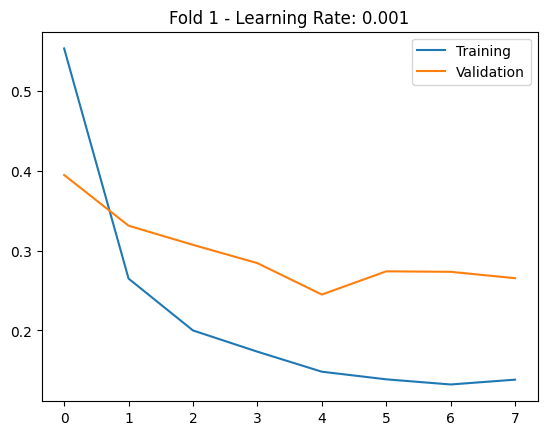

Epoch 1/10
32/32 [==============================] - 12s 312ms/step - loss: 0.4121 - accuracy: 0.3823 - val_loss: 0.3373 - val_accuracy: 0.4286
Epoch 2/10
32/32 [==============================] - 9s 293ms/step - loss: 0.2868 - accuracy: 0.4429 - val_loss: 0.2949 - val_accuracy: 0.4643
Epoch 3/10
32/32 [==============================] - 9s 283ms/step - loss: 0.2450 - accuracy: 0.4518 - val_loss: 0.2886 - val_accuracy: 0.4206
Epoch 4/10
32/32 [==============================] - 9s 292ms/step - loss: 0.2250 - accuracy: 0.4638 - val_loss: 0.3312 - val_accuracy: 0.3849
Epoch 5/10
32/32 [==============================] - 10s 309ms/step - loss: 0.2140 - accuracy: 0.4826 - val_loss: 0.3084 - val_accuracy: 0.4246
Epoch 6/10
32/32 [==============================] - 9s 297ms/step - loss: 0.1947 - accuracy: 0.4806 - val_loss: 0.2606 - val_accuracy: 0.4603
Epoch 7/10
32/32 [==============================] - 9s 279ms/step - loss: 0.1751 - accuracy: 0.4906 - val_loss: 0.2682 - val_accuracy: 0.4365
Epoc

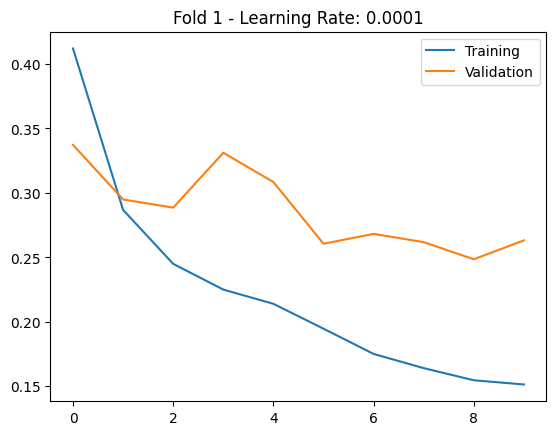

Fold 2/5
Found 1007 validated image filenames.
Found 252 validated image filenames.
Epoch 1/10
32/32 [==============================] - 11s 318ms/step - loss: 0.5645 - accuracy: 0.3287 - val_loss: 0.3253 - val_accuracy: 0.4643
Epoch 2/10
32/32 [==============================] - 9s 278ms/step - loss: 0.2353 - accuracy: 0.4419 - val_loss: 0.2812 - val_accuracy: 0.4921
Epoch 3/10
32/32 [==============================] - 10s 303ms/step - loss: 0.2056 - accuracy: 0.4886 - val_loss: 0.2630 - val_accuracy: 0.5238
Epoch 4/10
32/32 [==============================] - 10s 299ms/step - loss: 0.1802 - accuracy: 0.4965 - val_loss: 0.2732 - val_accuracy: 0.4683
Epoch 5/10
32/32 [==============================] - 9s 267ms/step - loss: 0.1591 - accuracy: 0.4945 - val_loss: 0.2311 - val_accuracy: 0.6071
Epoch 6/10
32/32 [==============================] - 10s 297ms/step - loss: 0.1426 - accuracy: 0.5055 - val_loss: 0.3007 - val_accuracy: 0.5476
Epoch 7/10
32/32 [==============================] - 9s 292ms

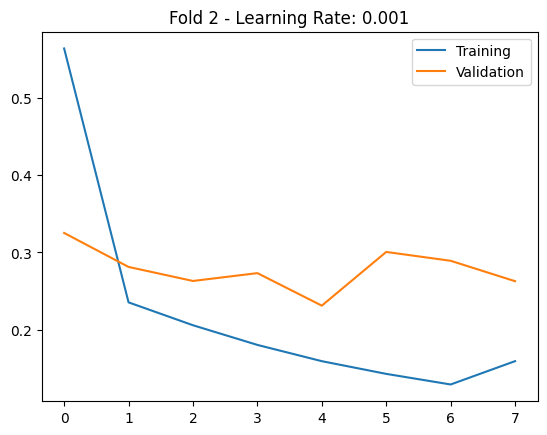

Epoch 1/10
32/32 [==============================] - 11s 318ms/step - loss: 0.4222 - accuracy: 0.3496 - val_loss: 0.3353 - val_accuracy: 0.4841
Epoch 2/10
32/32 [==============================] - 10s 300ms/step - loss: 0.2897 - accuracy: 0.3744 - val_loss: 0.2886 - val_accuracy: 0.4762
Epoch 3/10
32/32 [==============================] - 10s 303ms/step - loss: 0.2498 - accuracy: 0.3942 - val_loss: 0.2848 - val_accuracy: 0.4683
Epoch 4/10
32/32 [==============================] - 8s 266ms/step - loss: 0.2245 - accuracy: 0.4300 - val_loss: 0.2820 - val_accuracy: 0.4762
Epoch 5/10
32/32 [==============================] - 10s 302ms/step - loss: 0.2042 - accuracy: 0.4250 - val_loss: 0.2630 - val_accuracy: 0.5119
Epoch 6/10
32/32 [==============================] - 9s 293ms/step - loss: 0.1920 - accuracy: 0.4459 - val_loss: 0.2681 - val_accuracy: 0.4722
Epoch 7/10
32/32 [==============================] - 9s 283ms/step - loss: 0.1839 - accuracy: 0.4528 - val_loss: 0.2674 - val_accuracy: 0.5198
Ep

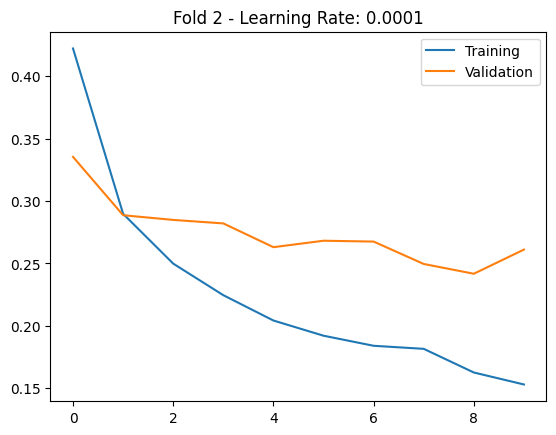

Fold 3/5
Found 1007 validated image filenames.
Found 252 validated image filenames.
Epoch 1/10
32/32 [==============================] - 11s 312ms/step - loss: 0.5950 - accuracy: 0.3644 - val_loss: 0.4205 - val_accuracy: 0.3968
Epoch 2/10
32/32 [==============================] - 9s 281ms/step - loss: 0.2486 - accuracy: 0.3774 - val_loss: 0.3646 - val_accuracy: 0.3373
Epoch 3/10
32/32 [==============================] - 9s 293ms/step - loss: 0.2058 - accuracy: 0.4449 - val_loss: 0.3860 - val_accuracy: 0.5317
Epoch 4/10
32/32 [==============================] - 10s 322ms/step - loss: 0.2146 - accuracy: 0.4568 - val_loss: 0.3064 - val_accuracy: 0.4802
Epoch 5/10
32/32 [==============================] - 9s 293ms/step - loss: 0.1666 - accuracy: 0.4548 - val_loss: 0.2414 - val_accuracy: 0.5317
Epoch 6/10
32/32 [==============================] - 9s 282ms/step - loss: 0.1392 - accuracy: 0.4647 - val_loss: 0.2721 - val_accuracy: 0.5040
Epoch 7/10
32/32 [==============================] - 10s 308ms/

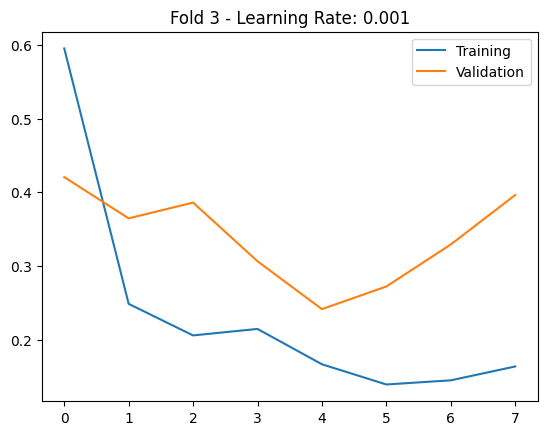

Epoch 1/10
32/32 [==============================] - 11s 311ms/step - loss: 0.3914 - accuracy: 0.3684 - val_loss: 0.3709 - val_accuracy: 0.4365
Epoch 2/10
32/32 [==============================] - 10s 303ms/step - loss: 0.2800 - accuracy: 0.3893 - val_loss: 0.2922 - val_accuracy: 0.4802
Epoch 3/10
32/32 [==============================] - 10s 313ms/step - loss: 0.2448 - accuracy: 0.4171 - val_loss: 0.2849 - val_accuracy: 0.5119
Epoch 4/10
32/32 [==============================] - 9s 295ms/step - loss: 0.2146 - accuracy: 0.4399 - val_loss: 0.2915 - val_accuracy: 0.4563
Epoch 5/10
32/32 [==============================] - 9s 266ms/step - loss: 0.2026 - accuracy: 0.4419 - val_loss: 0.2891 - val_accuracy: 0.4881
Epoch 6/10
32/32 [==============================] - 10s 304ms/step - loss: 0.1895 - accuracy: 0.4677 - val_loss: 0.2634 - val_accuracy: 0.4960
Epoch 7/10
32/32 [==============================] - 9s 290ms/step - loss: 0.1775 - accuracy: 0.4608 - val_loss: 0.2530 - val_accuracy: 0.5040
Ep

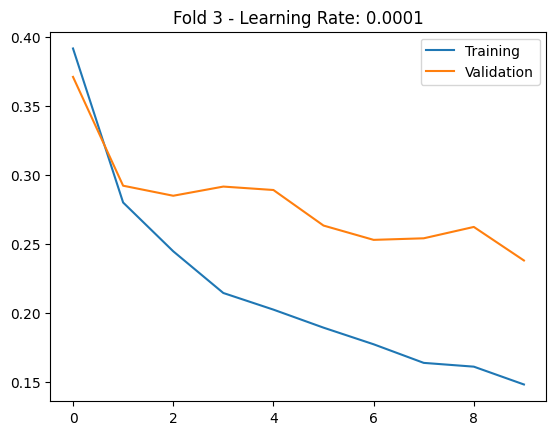

Fold 4/5
Found 1007 validated image filenames.
Found 252 validated image filenames.
Epoch 1/10
32/32 [==============================] - 11s 295ms/step - loss: 0.5111 - accuracy: 0.3903 - val_loss: 0.3087 - val_accuracy: 0.3452
Epoch 2/10
32/32 [==============================] - 9s 290ms/step - loss: 0.2388 - accuracy: 0.4945 - val_loss: 0.2692 - val_accuracy: 0.4762
Epoch 3/10
32/32 [==============================] - 9s 287ms/step - loss: 0.2065 - accuracy: 0.5194 - val_loss: 0.2447 - val_accuracy: 0.4762
Epoch 4/10
32/32 [==============================] - 10s 317ms/step - loss: 0.1722 - accuracy: 0.5303 - val_loss: 0.2186 - val_accuracy: 0.4286
Epoch 5/10
32/32 [==============================] - 10s 322ms/step - loss: 0.1542 - accuracy: 0.5492 - val_loss: 0.2207 - val_accuracy: 0.3929
Epoch 6/10
32/32 [==============================] - 9s 273ms/step - loss: 0.1389 - accuracy: 0.5492 - val_loss: 0.2178 - val_accuracy: 0.5238
Epoch 7/10
32/32 [==============================] - 10s 301ms

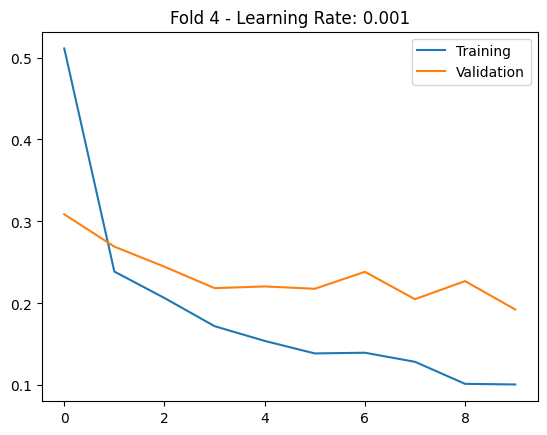

Epoch 1/10
32/32 [==============================] - 11s 293ms/step - loss: 0.3873 - accuracy: 0.3972 - val_loss: 0.3562 - val_accuracy: 0.3294
Epoch 2/10
32/32 [==============================] - 10s 307ms/step - loss: 0.2792 - accuracy: 0.4409 - val_loss: 0.3370 - val_accuracy: 0.2738
Epoch 3/10
32/32 [==============================] - 10s 297ms/step - loss: 0.2455 - accuracy: 0.4538 - val_loss: 0.2655 - val_accuracy: 0.3968
Epoch 4/10
32/32 [==============================] - 10s 303ms/step - loss: 0.2215 - accuracy: 0.4638 - val_loss: 0.2593 - val_accuracy: 0.4167
Epoch 5/10
32/32 [==============================] - 9s 270ms/step - loss: 0.2077 - accuracy: 0.4945 - val_loss: 0.2482 - val_accuracy: 0.3929
Epoch 6/10
32/32 [==============================] - 10s 300ms/step - loss: 0.1929 - accuracy: 0.4955 - val_loss: 0.2369 - val_accuracy: 0.4206
Epoch 7/10
32/32 [==============================] - 10s 305ms/step - loss: 0.1832 - accuracy: 0.4786 - val_loss: 0.2467 - val_accuracy: 0.5317


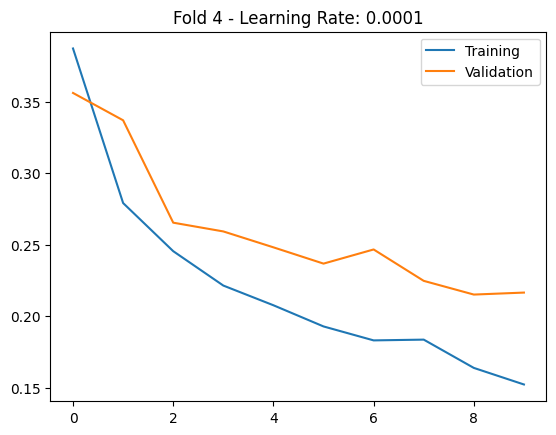

Fold 5/5
Found 1008 validated image filenames.
Found 251 validated image filenames.
Epoch 1/10
32/32 [==============================] - 16s 460ms/step - loss: 0.4468 - accuracy: 0.3611 - val_loss: 0.3053 - val_accuracy: 0.3665
Epoch 2/10
32/32 [==============================] - 9s 294ms/step - loss: 0.2260 - accuracy: 0.4653 - val_loss: 0.2510 - val_accuracy: 0.4741
Epoch 3/10
32/32 [==============================] - 10s 310ms/step - loss: 0.1927 - accuracy: 0.4742 - val_loss: 0.2897 - val_accuracy: 0.4223
Epoch 4/10
32/32 [==============================] - 9s 266ms/step - loss: 0.1762 - accuracy: 0.4950 - val_loss: 0.2171 - val_accuracy: 0.5737
Epoch 5/10
32/32 [==============================] - 9s 291ms/step - loss: 0.1504 - accuracy: 0.5347 - val_loss: 0.2289 - val_accuracy: 0.4861
Epoch 6/10
32/32 [==============================] - 10s 315ms/step - loss: 0.1216 - accuracy: 0.5149 - val_loss: 0.2059 - val_accuracy: 0.5219
Epoch 7/10
32/32 [==============================] - 8s 270ms/

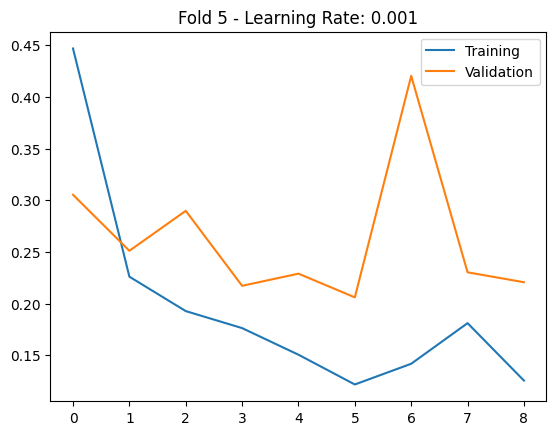

Epoch 1/10
32/32 [==============================] - 11s 295ms/step - loss: 0.3844 - accuracy: 0.3750 - val_loss: 0.3464 - val_accuracy: 0.3904
Epoch 2/10
32/32 [==============================] - 10s 305ms/step - loss: 0.2870 - accuracy: 0.4256 - val_loss: 0.3224 - val_accuracy: 0.3904
Epoch 3/10
32/32 [==============================] - 9s 279ms/step - loss: 0.2425 - accuracy: 0.4345 - val_loss: 0.2858 - val_accuracy: 0.3944
Epoch 4/10
32/32 [==============================] - 10s 307ms/step - loss: 0.2185 - accuracy: 0.4474 - val_loss: 0.2593 - val_accuracy: 0.4582
Epoch 5/10
32/32 [==============================] - 9s 294ms/step - loss: 0.1973 - accuracy: 0.4494 - val_loss: 0.2776 - val_accuracy: 0.4024
Epoch 6/10
32/32 [==============================] - 9s 294ms/step - loss: 0.1981 - accuracy: 0.4633 - val_loss: 0.2564 - val_accuracy: 0.4701
Epoch 7/10
32/32 [==============================] - 9s 289ms/step - loss: 0.1850 - accuracy: 0.4812 - val_loss: 0.2729 - val_accuracy: 0.4861
Epo

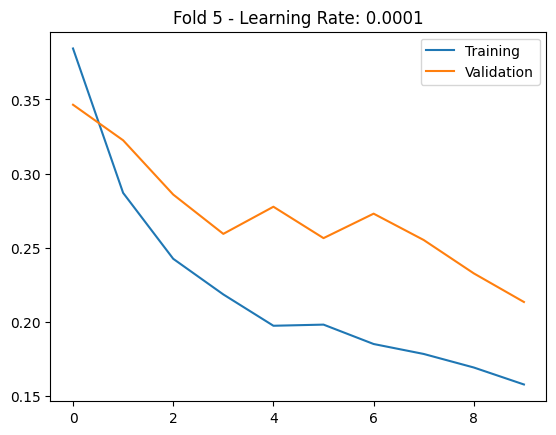

Best Validation Accuracy: 0.6071428656578064
Best Hyperparameters: {'learning_rate': 0.001}


In [9]:


# Cross-Validation Setup
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Hyperparameter Grid
param_grid = {
    'learning_rate': [0.001, 0.0001]
}

best_score = 0.0
best_params = {}

for fold, (train_indices, val_indices) in enumerate(kfold.split(df)):
    print(f"Fold {fold + 1}/{num_folds}")

    train_generator = datagen.flow_from_dataframe(
        df.iloc[train_indices],
        directory=image_dir,
        x_col='fname',
        y_col=mlb.classes_,
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
        )
    valid_generator = datagen.flow_from_dataframe(
        df.iloc[val_indices],
        directory=image_dir,
        x_col='fname',
        y_col=mlb.classes_,
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
    )
    y_train = df.iloc[train_indices][mlb.classes_].values


    # Class weights
    class_weights = class_weight.compute_class_weight(
        'balanced',
        classes=np.unique(np.argmax(y_train, axis=1)),
        y=np.argmax(y_train, axis=1),
    )
    class_weights = {i: class_weights[i] for i in range(len(class_weights))}

    for lr in param_grid['learning_rate']:

        # Build model
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
        # Load pre-trained VGG16 model + higher level layers
        x = base_model.output
        x = Flatten()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(len(mlb.classes_), activation='sigmoid')(x)

        vgg16_model = Model(inputs=base_model.input, outputs=predictions)
        for layer in base_model.layers:
          layer.trainable = False


        # Compile with specific learning rate and class weights
        vgg16_model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

        # Early Stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Train the model
        history = vgg16_model.fit(
            train_generator,
            validation_data=valid_generator,
            epochs=10,
            callbacks=[early_stopping],
            class_weight=class_weights
        )

        # Evaluate on validation set
        val_loss, val_acc = vgg16_model.evaluate(valid_generator)


        if val_acc > best_score:
            best_score = val_acc
            best_params = {'learning_rate': lr}


        plt.plot(history.history['loss'], label='Training')
        plt.plot(history.history['val_loss'], label='Validation')
        plt.title(f'Fold {fold + 1} - Learning Rate: {lr}')
        plt.legend()
        plt.show()

print("Best Validation Accuracy:", best_score)
print("Best Hyperparameters:", best_params)


## Custom Pytorch model

### Load and process data

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.model_selection import KFold
from sklearn.utils import class_weight
from sklearn.metrics import classification_report , accuracy_score


class CustomDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name)
        if image.mode != 'RGB':
            image = image.convert('RGB')
        labels = torch.FloatTensor(self.dataframe.iloc[idx, 3:].values.astype(float))
        if self.transform:
            image = self.transform(image)
        return image, labels





#  transformations for training and validation datasets
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

df = pd.read_pickle(annotations_path)

df['labels'] = df['labels'].apply(lambda x: x.split())

# One-hot encoding of the labels
mlb = MultiLabelBinarizer()
df_labels = pd.DataFrame(mlb.fit_transform(df['labels']), columns=mlb.classes_, index=df.index)

# Merge one-hot encoded labels with original dataframe
df = pd.concat([df, df_labels], axis=1)

# Train-validation split
train_df, valid_df = train_test_split(df, test_size=0.2, stratify=df['is_valid'])

# Create datasets
train_dataset = CustomDataset(train_df, image_dir, transform)
valid_dataset = CustomDataset(valid_df, image_dir, transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)



In [18]:
import torch.nn as nn
import torch.nn.functional as F

import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=1, groups=32),
            nn.Conv2d(32, 64, kernel_size=1)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1, groups=64),
            nn.Conv2d(64, 128, kernel_size=1)
        )
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc(x))
        x = self.dropout(x)
        x = torch.sigmoid(x)
        return x



# Initialize the model
custom_cnn = CustomCNN(len(mlb.classes_))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
custom_cnn.to(device)


CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
    (1): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
  )
  (conv3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64)
    (1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=128, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [23]:

# Cross-Validation Setup
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Hyperparameter Grid
param_grid = {
    'lr': [0.001, 0.0001],
    'weight_decay': [0, 1e-5],

}

best_score = 0.0
best_params = {}

for fold, (train_indices, val_indices) in enumerate(kfold.split(df)):
    print(f"Fold {fold + 1}/{num_folds}")

    train_dataset = CustomDataset(df.iloc[train_indices], image_dir, transform)
    valid_dataset = CustomDataset(df.iloc[val_indices], image_dir, transform)

    #  DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

    # Extract labels for this fold and calculate class weights
    y_train = df.iloc[train_indices][mlb.classes_].values
    class_weights = class_weight.compute_class_weight(
        'balanced',
        classes=np.unique(np.argmax(y_train, axis=1)),
        y=np.argmax(y_train, axis=1),
    )
    class_weights = torch.FloatTensor(class_weights).to(device)

    for lr in param_grid['lr']:
        for wd in param_grid['weight_decay']:
            print(f"  Learning Rate: {lr}, Weight Decay: {wd}")

            # Initialize Model and Optimizer
            custom_cnn = CustomCNN(len(mlb.classes_)).to(device)
            criterion = nn.BCELoss(weight=class_weights)
            optimizer = optim.Adam(custom_cnn.parameters(), lr=lr, weight_decay=wd)

            # Early Stopping
            patience = 3
            best_val_loss = float('inf')
            epochs_without_improvement = 0
            # early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

            # Model Training
            num_epochs = 10
            train_losses = []
            val_losses = []
            for epoch in range(num_epochs):
                custom_cnn.train()
                train_loss = 0.0

                for images, labels in train_loader:
                    images, labels = images.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = custom_cnn(images)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item() * images.size(0)

                train_loss = train_loss / len(train_loader.dataset)
                train_losses.append(train_loss)

                # Validation
                custom_cnn.eval()
                val_loss = 0.0
                with torch.no_grad():
                    for images, labels in valid_loader:
                        images, labels = images.to(device), labels.to(device)
                        outputs = custom_cnn(images)
                        loss = criterion(outputs, labels)
                        val_loss += loss.item() * images.size(0)

                val_loss = val_loss / len(valid_loader.dataset)
                val_losses.append(val_loss)

                print(f"    Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    epochs_without_improvement = 0
                else:
                    epochs_without_improvement += 1
                    if epochs_without_improvement >= patience:
                        print("    Early stopping triggered.")
                        break

            # Model Evaluation
            custom_cnn.eval()
            all_labels = []
            all_preds = []
            with torch.no_grad():
                for images, labels in valid_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = custom_cnn(images)
                    preds = (outputs > 0.5).float()
                    all_labels.append(labels.cpu().numpy())
                    all_preds.append(preds.cpu().numpy())

            all_labels = np.concatenate(all_labels, axis=0)
            all_preds = np.concatenate(all_preds, axis=0)

            val_acc = accuracy_score(all_labels, all_preds)
            print(f"    Validation Accuracy: {val_acc:.4f}")
            print("    Classification Report:\n", classification_report(all_labels, all_preds, target_names=mlb.classes_))

            if val_acc > best_score:
                best_score = val_acc
                best_params = {'lr': lr, 'weight_decay': wd}

print("\nBest Validation Accuracy:", best_score)
print("Best Hyperparameters:", best_params)

Fold 1/5
  Learning Rate: 0.001, Weight Decay: 0
    Epoch 1/10, Train Loss: 0.9544, Val Loss: 0.7860
    Epoch 2/10, Train Loss: 0.8574, Val Loss: 0.6904
    Epoch 3/10, Train Loss: 0.8349, Val Loss: 0.6614
    Epoch 4/10, Train Loss: 0.8438, Val Loss: 0.6314
    Epoch 5/10, Train Loss: 0.8047, Val Loss: 0.6351
    Epoch 6/10, Train Loss: 0.8349, Val Loss: 0.6600
    Epoch 7/10, Train Loss: 0.8378, Val Loss: 0.6416
    Early stopping triggered.
    Validation Accuracy: 0.6230
    Classification Report:
               precision    recall  f1-score   support

      algues       0.94      0.39      0.55        80
     rochers       0.85      0.96      0.90       212
       sable       0.94      0.98      0.96       205

   micro avg       0.90      0.88      0.89       497
   macro avg       0.91      0.78      0.80       497
weighted avg       0.90      0.88      0.87       497
 samples avg       0.90      0.90      0.88       497

  Learning Rate: 0.001, Weight Decay: 1e-05
    Epoch 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0100, Val Loss: 0.9721
    Epoch 2/10, Train Loss: 0.9737, Val Loss: 0.9275
    Epoch 3/10, Train Loss: 0.9470, Val Loss: 0.8890
    Epoch 4/10, Train Loss: 0.9307, Val Loss: 0.8572
    Epoch 5/10, Train Loss: 0.9344, Val Loss: 0.8434
    Epoch 6/10, Train Loss: 0.9037, Val Loss: 0.8023
    Epoch 7/10, Train Loss: 0.8747, Val Loss: 0.7543
    Epoch 8/10, Train Loss: 0.8708, Val Loss: 0.7513
    Epoch 9/10, Train Loss: 0.8447, Val Loss: 0.7115
    Epoch 10/10, Train Loss: 0.8707, Val Loss: 0.7136
    Validation Accuracy: 0.5238
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        80
     rochers       0.84      1.00      0.91       212
       sable       0.91      1.00      0.95       205

   micro avg       0.88      0.84      0.86       497
   macro avg       0.59      0.67      0.62       497
weighted avg       0.74      0.84      0.78       497
 samples avg       0.88      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0773, Val Loss: 1.0773
    Epoch 2/10, Train Loss: 1.0773, Val Loss: 1.0773
    Epoch 3/10, Train Loss: 1.0773, Val Loss: 1.0773
    Epoch 4/10, Train Loss: 1.0773, Val Loss: 1.0773
    Early stopping triggered.
    Validation Accuracy: 0.0000
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        80
     rochers       0.00      0.00      0.00       209
       sable       0.00      0.00      0.00       194

   micro avg       0.00      0.00      0.00       483
   macro avg       0.00      0.00      0.00       483
weighted avg       0.00      0.00      0.00       483
 samples avg       0.00      0.00      0.00       483

  Learning Rate: 0.001, Weight Decay: 1e-05


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0462, Val Loss: 0.9379
    Epoch 2/10, Train Loss: 0.9298, Val Loss: 0.7945
    Epoch 3/10, Train Loss: 0.8781, Val Loss: 0.7570
    Epoch 4/10, Train Loss: 0.8401, Val Loss: 0.6636
    Epoch 5/10, Train Loss: 0.8324, Val Loss: 0.7205
    Epoch 6/10, Train Loss: 0.8464, Val Loss: 0.6828
    Epoch 7/10, Train Loss: 0.8528, Val Loss: 0.6996
    Early stopping triggered.
    Validation Accuracy: 0.6270
    Classification Report:
               precision    recall  f1-score   support

      algues       0.80      0.55      0.65        80
     rochers       0.83      1.00      0.90       209
       sable       0.95      0.94      0.94       194

   micro avg       0.87      0.90      0.88       483
   macro avg       0.86      0.83      0.83       483
weighted avg       0.87      0.90      0.88       483
 samples avg       0.87      0.92      0.88       483

  Learning Rate: 0.0001, Weight Decay: 0
    Epoch 1/10, Train Loss: 1.0454, Val Loss: 1.0208
    Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0773, Val Loss: 1.0773
    Epoch 2/10, Train Loss: 1.0773, Val Loss: 1.0773
    Epoch 3/10, Train Loss: 1.0773, Val Loss: 1.0773
    Epoch 4/10, Train Loss: 1.0773, Val Loss: 1.0773
    Early stopping triggered.
    Validation Accuracy: 0.0000
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        80
     rochers       0.00      0.00      0.00       209
       sable       0.00      0.00      0.00       194

   micro avg       0.00      0.00      0.00       483
   macro avg       0.00      0.00      0.00       483
weighted avg       0.00      0.00      0.00       483
 samples avg       0.00      0.00      0.00       483

Fold 3/5
  Learning Rate: 0.001, Weight Decay: 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 0.9709, Val Loss: 0.8021
    Epoch 2/10, Train Loss: 0.8895, Val Loss: 0.7179
    Epoch 3/10, Train Loss: 0.8451, Val Loss: 0.7399
    Epoch 4/10, Train Loss: 0.8491, Val Loss: 0.6922
    Epoch 5/10, Train Loss: 0.8402, Val Loss: 0.7073
    Epoch 6/10, Train Loss: 0.8577, Val Loss: 0.6885
    Epoch 7/10, Train Loss: 0.8508, Val Loss: 0.7051
    Epoch 8/10, Train Loss: 0.8516, Val Loss: 0.7260
    Epoch 9/10, Train Loss: 0.8427, Val Loss: 0.6924
    Early stopping triggered.
    Validation Accuracy: 0.4921
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        76
     rochers       0.81      1.00      0.90       205
       sable       0.91      0.98      0.94       198

   micro avg       0.86      0.84      0.85       479
   macro avg       0.57      0.66      0.61       479
weighted avg       0.72      0.84      0.77       479
 samples avg       0.87      0.86      0.83       479

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0757, Val Loss: 1.0755
    Epoch 2/10, Train Loss: 1.0755, Val Loss: 1.0755
    Epoch 3/10, Train Loss: 1.0688, Val Loss: 0.9369
    Epoch 4/10, Train Loss: 0.9541, Val Loss: 0.7973
    Epoch 5/10, Train Loss: 0.8429, Val Loss: 0.7157
    Epoch 6/10, Train Loss: 0.8601, Val Loss: 0.6885
    Epoch 7/10, Train Loss: 0.8320, Val Loss: 0.7009
    Epoch 8/10, Train Loss: 0.8418, Val Loss: 0.7299
    Epoch 9/10, Train Loss: 0.8372, Val Loss: 0.6787
    Epoch 10/10, Train Loss: 0.8582, Val Loss: 0.7173
    Validation Accuracy: 0.6111
    Classification Report:
               precision    recall  f1-score   support

      algues       0.86      0.42      0.57        76
     rochers       0.81      1.00      0.90       205
       sable       0.92      0.98      0.95       198

   micro avg       0.86      0.90      0.88       479
   macro avg       0.86      0.80      0.80       479
weighted avg       0.86      0.90      0.87       479
 samples avg       0.86      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0700, Val Loss: 1.0631
    Epoch 2/10, Train Loss: 1.0591, Val Loss: 1.0519
    Epoch 3/10, Train Loss: 1.0540, Val Loss: 1.0448
    Epoch 4/10, Train Loss: 1.0487, Val Loss: 1.0408
    Epoch 5/10, Train Loss: 1.0507, Val Loss: 1.0391
    Epoch 6/10, Train Loss: 1.0486, Val Loss: 1.0391
    Epoch 7/10, Train Loss: 1.0507, Val Loss: 1.0384
    Epoch 8/10, Train Loss: 1.0487, Val Loss: 1.0387
    Epoch 9/10, Train Loss: 1.0497, Val Loss: 1.0380
    Epoch 10/10, Train Loss: 1.0483, Val Loss: 1.0376
    Validation Accuracy: 0.0833
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        76
     rochers       0.81      1.00      0.90       205
       sable       0.00      0.00      0.00       198

   micro avg       0.81      0.43      0.56       479
   macro avg       0.27      0.33      0.30       479
weighted avg       0.35      0.43      0.38       479
 samples avg       0.81      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0078, Val Loss: 0.9927
    Epoch 2/10, Train Loss: 0.9981, Val Loss: 0.9791
    Epoch 3/10, Train Loss: 0.9959, Val Loss: 0.9722
    Epoch 4/10, Train Loss: 0.9964, Val Loss: 0.9717
    Epoch 5/10, Train Loss: 0.9914, Val Loss: 0.9643
    Epoch 6/10, Train Loss: 0.9956, Val Loss: 0.9718
    Epoch 7/10, Train Loss: 0.9915, Val Loss: 0.9704
    Epoch 8/10, Train Loss: 0.9834, Val Loss: 0.8581
    Epoch 9/10, Train Loss: 0.8305, Val Loss: 0.6786
    Epoch 10/10, Train Loss: 0.8100, Val Loss: 0.6361
    Validation Accuracy: 0.4921
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        92
     rochers       0.83      1.00      0.90       208
       sable       0.92      0.98      0.95       199

   micro avg       0.87      0.81      0.84       499
   macro avg       0.58      0.66      0.62       499
weighted avg       0.71      0.81      0.76       499
 samples avg       0.88      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 0.9186, Val Loss: 0.7812
    Epoch 2/10, Train Loss: 0.8518, Val Loss: 0.6789
    Epoch 3/10, Train Loss: 0.8425, Val Loss: 0.6825
    Epoch 4/10, Train Loss: 0.8240, Val Loss: 0.6643
    Epoch 5/10, Train Loss: 0.8129, Val Loss: 0.6848
    Epoch 6/10, Train Loss: 0.8178, Val Loss: 0.6720
    Epoch 7/10, Train Loss: 0.8261, Val Loss: 0.6807
    Early stopping triggered.
    Validation Accuracy: 0.4683
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        92
     rochers       0.83      0.97      0.90       208
       sable       0.93      0.96      0.95       199

   micro avg       0.88      0.79      0.83       499
   macro avg       0.59      0.64      0.61       499
weighted avg       0.72      0.79      0.75       499
 samples avg       0.89      0.81      0.82       499

  Learning Rate: 0.0001, Weight Decay: 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0276, Val Loss: 1.0270
    Epoch 2/10, Train Loss: 1.0270, Val Loss: 1.0270
    Epoch 3/10, Train Loss: 1.0270, Val Loss: 1.0270
    Epoch 4/10, Train Loss: 1.0270, Val Loss: 1.0270
    Early stopping triggered.
    Validation Accuracy: 0.0000
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        92
     rochers       0.00      0.00      0.00       208
       sable       0.00      0.00      0.00       199

   micro avg       0.00      0.00      0.00       499
   macro avg       0.00      0.00      0.00       499
weighted avg       0.00      0.00      0.00       499
 samples avg       0.00      0.00      0.00       499

  Learning Rate: 0.0001, Weight Decay: 1e-05


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0270, Val Loss: 1.0270
    Epoch 2/10, Train Loss: 1.0270, Val Loss: 1.0270
    Epoch 3/10, Train Loss: 1.0270, Val Loss: 1.0270
    Epoch 4/10, Train Loss: 1.0270, Val Loss: 1.0270
    Early stopping triggered.
    Validation Accuracy: 0.0000
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        92
     rochers       0.00      0.00      0.00       208
       sable       0.00      0.00      0.00       199

   micro avg       0.00      0.00      0.00       499
   macro avg       0.00      0.00      0.00       499
weighted avg       0.00      0.00      0.00       499
 samples avg       0.00      0.00      0.00       499

Fold 5/5
  Learning Rate: 0.001, Weight Decay: 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 0.9631, Val Loss: 0.8777
    Epoch 2/10, Train Loss: 0.8706, Val Loss: 0.7191
    Epoch 3/10, Train Loss: 0.8488, Val Loss: 0.6987
    Epoch 4/10, Train Loss: 0.8480, Val Loss: 0.6729
    Epoch 5/10, Train Loss: 0.8512, Val Loss: 0.7126
    Epoch 6/10, Train Loss: 0.8115, Val Loss: 0.6752
    Epoch 7/10, Train Loss: 0.8124, Val Loss: 0.6876
    Early stopping triggered.
    Validation Accuracy: 0.6534
    Classification Report:
               precision    recall  f1-score   support

      algues       0.97      0.47      0.63        81
     rochers       0.82      1.00      0.90       207
       sable       0.91      0.99      0.95       192

   micro avg       0.87      0.91      0.89       480
   macro avg       0.90      0.82      0.83       480
weighted avg       0.88      0.91      0.88       480
 samples avg       0.87      0.93      0.88       480

  Learning Rate: 0.001, Weight Decay: 1e-05
    Epoch 1/10, Train Loss: 1.0378, Val Loss: 1.0239
    Epo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0551, Val Loss: 1.0482
    Epoch 2/10, Train Loss: 1.0447, Val Loss: 1.0374
    Epoch 3/10, Train Loss: 1.0390, Val Loss: 1.0289
    Epoch 4/10, Train Loss: 1.0355, Val Loss: 1.0249
    Epoch 5/10, Train Loss: 1.0372, Val Loss: 1.0240
    Epoch 6/10, Train Loss: 1.0391, Val Loss: 1.0240
    Epoch 7/10, Train Loss: 1.0352, Val Loss: 1.0219
    Epoch 8/10, Train Loss: 1.0334, Val Loss: 1.0196
    Epoch 9/10, Train Loss: 1.0330, Val Loss: 1.0170
    Epoch 10/10, Train Loss: 1.0330, Val Loss: 1.0140
    Validation Accuracy: 0.1992
    Classification Report:
               precision    recall  f1-score   support

      algues       0.51      0.68      0.59        81
     rochers       0.82      1.00      0.90       207
       sable       0.00      0.00      0.00       192

   micro avg       0.73      0.55      0.63       480
   macro avg       0.45      0.56      0.50       480
weighted avg       0.44      0.55      0.49       480
 samples avg       0.74      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Epoch 1/10, Train Loss: 1.0058, Val Loss: 0.9756
    Epoch 2/10, Train Loss: 0.9686, Val Loss: 0.9346
    Epoch 3/10, Train Loss: 0.9549, Val Loss: 0.9115
    Epoch 4/10, Train Loss: 0.9379, Val Loss: 0.8940
    Epoch 5/10, Train Loss: 0.9288, Val Loss: 0.8695
    Epoch 6/10, Train Loss: 0.8902, Val Loss: 0.8241
    Epoch 7/10, Train Loss: 0.8918, Val Loss: 0.7959
    Epoch 8/10, Train Loss: 0.8862, Val Loss: 0.7893
    Epoch 9/10, Train Loss: 0.8521, Val Loss: 0.7624
    Epoch 10/10, Train Loss: 0.8549, Val Loss: 0.7441
    Validation Accuracy: 0.5020
    Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        81
     rochers       0.82      1.00      0.90       207
       sable       0.87      1.00      0.93       192

   micro avg       0.85      0.83      0.84       480
   macro avg       0.56      0.67      0.61       480
weighted avg       0.70      0.83      0.76       480
 samples avg       0.85      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using the best param in our custom model

    Epoch 1/10, Train Loss: 0.9374, Val Loss: 0.8715, Train Acc: 0.5319, Val Acc: 0.7778
    Epoch 2/10, Train Loss: 0.8648, Val Loss: 0.7165, Train Acc: 0.5644, Val Acc: 0.8122
    Epoch 3/10, Train Loss: 0.8041, Val Loss: 0.6766, Train Acc: 0.5776, Val Acc: 0.8214
    Epoch 4/10, Train Loss: 0.7923, Val Loss: 0.6910, Train Acc: 0.5885, Val Acc: 0.8241
    Epoch 5/10, Train Loss: 0.7917, Val Loss: 0.6946, Train Acc: 0.5885, Val Acc: 0.8175
    Epoch 6/10, Train Loss: 0.7957, Val Loss: 0.6880, Train Acc: 0.5809, Val Acc: 0.8201
    Early stopping triggered.


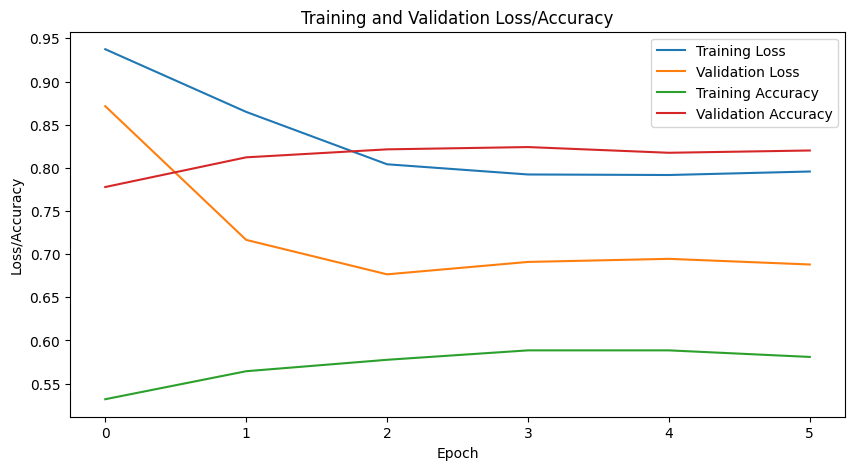


Classification Report:
               precision    recall  f1-score   support

      algues       0.00      0.00      0.00        73
     rochers       0.86      1.00      0.92       216
       sable       0.90      0.97      0.93       193

   micro avg       0.87      0.84      0.86       482
   macro avg       0.58      0.66      0.62       482
weighted avg       0.74      0.84      0.79       482
 samples avg       0.88      0.86      0.84       482



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:


best_lr = 0.001
best_weight_decay = 0

# Train-Validation Split

train_df, valid_df = train_test_split(df, test_size=0.2, stratify=df['is_valid'])
train_dataset = CustomDataset(train_df, image_dir, transform)
valid_dataset = CustomDataset(valid_df, image_dir, transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

# Class Weights

y_train = train_df[mlb.classes_].values
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1),
)
class_weights = torch.FloatTensor(class_weights).to(device)

#  Model Initialization

final_model = CustomCNN(len(mlb.classes_)).to(device)
criterion = nn.BCELoss(weight=class_weights)
optimizer = optim.Adam(final_model.parameters(), lr=best_lr)

#  Early Stopping
patience = 3
best_val_loss = float('inf')
epochs_without_improvement = 0

#  Training Loop with Accuracy Calculation

num_epochs = 10
train_losses = []
val_losses = []
train_accs = []
val_accs = []


for epoch in range(num_epochs):
    final_model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = final_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        predicted = (outputs > 0.5).float()
        total += labels.size(0) * labels.size(1)
        correct += (predicted == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation
    final_model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = final_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            predicted = (outputs > 0.5).float()
            total += labels.size(0) * labels.size(1)
            correct += (predicted == labels).sum().item()

    val_loss /= len(valid_loader.dataset)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"    Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    # Early Stopping Check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print("    Early stopping triggered.")
            break



# Plotting loss and accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.legend()
plt.show()

# Model Evaluation
final_model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = final_model(images)
        preds = (outputs > 0.5).float()
        all_labels.append(labels.cpu().numpy())
        all_preds.append(preds.cpu().numpy())

all_labels = np.concatenate(all_labels, axis=0)
all_preds = np.concatenate(all_preds, axis=0)

print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=mlb.classes_))



# **Machine Learning models**

## Feature Extraction

In [27]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from PIL import Image
from sklearn.model_selection import train_test_split

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

def extract_features(file, model):
    img = Image.open(file).resize((150, 150))
    img = np.array(img)
    if img.shape[2] == 4:
        img = img[:, :, :3]
    img = np.expand_dims(img, axis=0)
    features = model.predict(img)
    return features.flatten()

# Extract features for each image
features = []
labels = []

for idx, row in df.iterrows():
    img_path = os.path.join(image_dir, row['fname'])
    feature = extract_features(img_path, model)
    features.append(feature)
    labels.append(row[mlb.classes_].values.astype(np.float32))

X = np.array(features)
y = np.array(labels)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1/1 [==============================] - 0s 17ms/step


## SVM

In [28]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train SVM model
svm = OneVsRestClassifier(SVC(kernel='linear'))
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=mlb.classes_))


SVM Accuracy: 0.8214285714285714
SVM Classification Report:
               precision    recall  f1-score   support

      algues       0.86      0.85      0.86        80
     rochers       0.97      0.96      0.96       212
       sable       0.96      0.97      0.97       205

   micro avg       0.95      0.95      0.95       497
   macro avg       0.93      0.93      0.93       497
weighted avg       0.95      0.95      0.95       497
 samples avg       0.96      0.96      0.94       497



## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7817460317460317
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.68      0.80        80
           1       0.92      0.98      0.95       212
           2       0.94      1.00      0.97       205

   micro avg       0.93      0.94      0.93       497
   macro avg       0.95      0.88      0.90       497
weighted avg       0.94      0.94      0.93       497
 samples avg       0.94      0.95      0.93       497

